In [76]:
import pickle

from wordcloud import WordCloud
from collections import Counter # 워드를 카운팅해주는 라이브러리
import matplotlib.pyplot as plt # 데이터를 시각화 해주는 라이브러리

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()

rc('font',family=font_name) # 한글 폰트

In [2]:
with open('blog_text.pkl', 'rb') as f:
    blog_text = pickle.load(f)


In [85]:
from konlpy.tag import Okt
okt=Okt()

stopwords = ['있다', '안', '등', '이', '고', '것','되다', '등' , '수', '없다','원','이다','이하','표','식품','영양성분','좋다',
             '섭취','확인','때','같다','제품','표시','때문','량','더','높다','아니다','경우','기준','밒','우리','및','그렇다',
             '선택','중','도움','정보','풍부하다','오늘','생각','알','어떻다']

def extract_tag(result):
    result_word=[]
    words = okt.pos(result, stem=True, norm=True)
    for word, tag in words:
        if tag in ['Noun','Adjective']:
            if word not in stopwords:
                result_word.append(word)
    return result_word


In [86]:
all_list = []
for i in blog_text:
    all_list = all_list + extract_tag(i)
    

In [87]:
count = Counter(all_list)
count.most_common(30)

[('탄수화물', 1418),
 ('칼로리', 1236),
 ('다이어트', 1012),
 ('지방', 991),
 ('당류', 862),
 ('단백질', 838),
 ('함량', 707),
 ('성분', 682),
 ('영양소', 662),
 ('많다', 656),
 ('비타민', 650),
 ('식이섬유', 630),
 ('당질', 628),
 ('맛', 620),
 ('나트륨', 608),
 ('영양', 553),
 ('음식', 546),
 ('건강', 534),
 ('당', 512),
 ('효과', 418),
 ('위', 417),
 ('효능', 392),
 ('양', 363),
 ('설탕', 361),
 ('열량', 358),
 ('콜레스테롤', 355),
 ('재료', 354),
 ('포화지방', 345),
 ('몸', 344),
 ('건강하다', 335)]

In [88]:
count2 = count.most_common(70)
count3={}
for i,j in count2:
    count3[f'{i}'] = j

<function matplotlib.pyplot.show(close=None, block=None)>

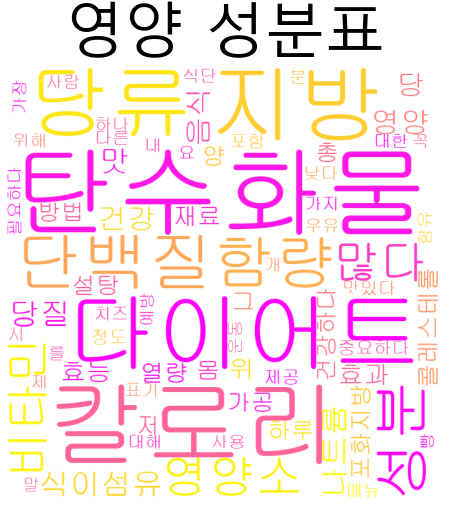

In [89]:
wordcloud = WordCloud(font_path='C:\\Windows\\Fonts\\gulim.ttc',
                 width = 700,
                 height = 700,
                 background_color='white',
                 colormap = 'spring',
                 random_state=1).generate_from_frequencies(count3)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("영양 성분표", size = 60)
plt.show